<a href="https://colab.research.google.com/github/jithendranaidupothala/stock-predic/blob/main/apple_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import yfinance as yf
from datetime import datetime

# Get stock data from Yahoo Finance using yfinance
start = datetime(2021, 2, 10)
end = datetime(2025, 4, 9)
data = yf.download("AAPL", start=start, end=end) # Use yf.download instead of pdr.data.DataReader
print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2021-02-10  132.443985  134.009176  131.475521  133.510264  73046600
2021-02-11  132.189682  133.422260  130.859274  132.942917  64280000
2021-02-12  132.424408  132.580930  130.780971  131.426613  60145100
2021-02-16  130.291901  133.050532  129.900595  132.541858  80576300
2021-02-17  127.992989  129.342965  126.652804  128.394071  97918500


In [ ]:
data.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

df=pd.read_csv('AAPL.csv')



In [ ]:
df

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2021-02-10,132.44398498535156,134.00917580672544,131.4755214853653,133.510263582445,73046600
3,2021-02-11,132.18968200683594,133.42226002186263,130.85927394263595,132.94291666374514,64280000
4,2021-02-12,132.42440795898438,132.58093001697634,130.78097113036387,131.42661342450694,60145100
...,...,...,...,...,...,...
1042,2025-04-02,223.88999938964844,225.19000244140625,221.02000427246094,221.32000732421875,35905900
1043,2025-04-03,203.19000244140625,207.49000549316406,201.25,205.5399932861328,103419000
1044,2025-04-04,188.3800048828125,199.8800048828125,187.33999633789062,193.88999938964844,125910900
1045,2025-04-07,181.4600067138672,194.14999389648438,174.6199951171875,177.1999969482422,160466300


In [ ]:
# prompt: remove forst 2 rows

df = df.iloc[2:]
df


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-06,6.348846,6.477045,6.342225,6.451465,552160000
2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200
2010-01-08,6.379241,6.379843,6.291368,6.328683,447610800
2010-01-11,6.322966,6.409936,6.273010,6.403917,462229600
2010-01-12,6.251040,6.312733,6.211919,6.295278,594459600
...,...,...,...,...,...
2025-04-01,223.190002,223.679993,218.899994,219.809998,36412700
2025-04-02,223.889999,225.190002,221.020004,221.320007,35905900


In [ ]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-06,6.348846,6.477045,6.342225,6.451465,552160000
2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200
2010-01-08,6.379241,6.379843,6.291368,6.328683,447610800
2010-01-11,6.322966,6.409936,6.273010,6.403917,462229600
2010-01-12,6.251040,6.312733,6.211919,6.295278,594459600


In [ ]:
df1=df.reset_index()['Close']



In [ ]:
df1.tail()

Ticker,AAPL
3832,223.190002
3833,223.889999
3834,203.190002
3835,188.380005
3836,181.460007


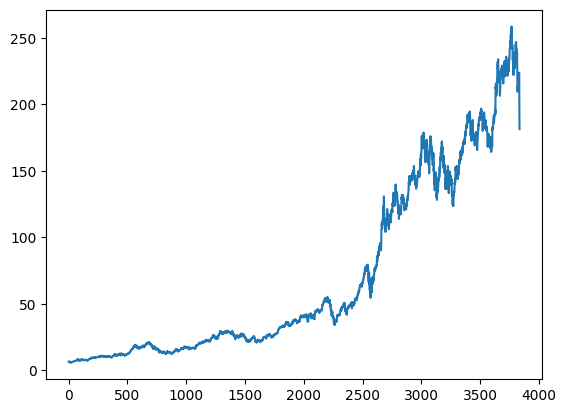

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
df1

Ticker,AAPL
0,6.348846
1,6.337109
2,6.379241
3,6.322966
4,6.251040
...,...
3832,223.190002
3833,223.889999
3834,203.190002
3835,188.380005


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.00225086],
       [0.00220446],
       [0.00237102],
       ...,
       [0.7804144 ],
       [0.72186668],
       [0.69451016]])

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [ ]:
training_size,test_size

(2494, 1343)

In [ ]:
train_data

array([[0.00225086],
       [0.00220446],
       [0.00237102],
       ...,
       [0.23350212],
       [0.23293745],
       [0.22997997]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [ ]:
print(X_train.shape), print(y_train.shape)


(2393, 100)
(2393,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)


(1242, 100)
(1242,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 285ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - loss: 5.0507e-05 - val_loss: 0.0018
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - loss: 2.7744e-05 - val_loss: 0.0019
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - loss: 2.8198e-05 - val_loss: 0.0011
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - loss: 3.0305e-05 - val_loss: 0.0011
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - loss: 2.7824e-05 - val_loss: 9.3851e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - loss: 2.4714e-05 - val_loss: 9.0052e-04
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - loss: 2.4043e-05 - val_loss: 8.3397e-04
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - loss: 2.5404e-05 - val_loss: 8.2774e-04
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - loss: 2.3273e-05 - val_loss: 7.6123e-04
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - loss: 2.

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

28.31149380624808

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


161.2769566511334

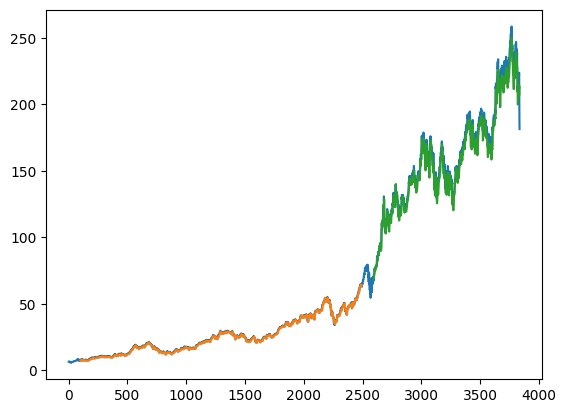

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

1343

In [ ]:
x_input=test_data[1243:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8626173475211532,
 0.8626173475211532,
 0.866131882580497,
 0.8783735493399871,
 0.8656579937071777,
 0.8775837546584228,
 0.8786104334547434,
 0.8814536460508526,
 0.8795582112013821,
 0.884889219738611,
 0.8967359589963672,
 0.9053840690030247,
 0.9048707296048644,
 0.9143481451398306,
 0.9232726501079889,
 0.9353563338024047,
 0.9367779401004593,
 0.9368964123187892,
 0.9361066176372247,
 0.9515469136478136,
 0.9555747881053177,
 0.9505201745295895,
 0.9563251322620412,
 0.9569963944033724,
 0.968487717006139,
 0.9781230552842761,
 0.9566804885951272,
 0.9635515756487406,
 0.9821115395388429,
 0.9851916965716117,
 0.9967620408678672,
 1.0,
 0.986455319804592,
 0.9730685020304514,
 0.9660394319117638,
 0.9400951018917914,
 0.938160095873673,
 0.9446363157474558,
 0.9336188820180085,
 0.93555376739232,
 0.9124526499684568,
 0.9027778008435752,
 0.8983549988843371,
 0.9164805244259608,
 0.878531472083158,
 0.8853235977651859,
 0.8563385612372856,
 0.8610377581580243,
 0.860366496016

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.68055457]
101
1 day input [0.86261735 0.86613188 0.87837355 0.86565799 0.87758375 0.87861043
 0.88145365 0.87955821 0.88488922 0.89673596 0.90538407 0.90487073
 0.91434815 0.92327265 0.93535633 0.93677794 0.93689641 0.93610662
 0.95154691 0.95557479 0.95052017 0.95632513 0.95699639 0.96848772
 0.97812306 0.95668049 0.96355158 0.98211154 0.9851917  0.99676204
 1.         0.98645532 0.9730685  0.96603943 0.9400951  0.9381601
 0.94463632 0.93361888 0.93555377 0.91245265 0.9027778  0.898355
 0.91648052 0.87853147 0.8853236  0.85633856 0.86103776 0.8603665
 0.85689141 0.88484971 0.9180206  0.92236444 0.91537482 0.9090961
 0.87754424 0.89645956 0.89515643 0.89811811 0.87604368 0.87711101
 0.8967587  0.91356004 0.93198223 0.94411875 0.94360481 0.94518609
 0.94898124 0.94787434 0.95400189 0.95376465 0.92735693 0.91525997
 0.93320773 0.91814583 0.90984397 0.9090929  0.90747205 0.92225725
 0.87643897 0.85018935 0.83492977 0.80607099 0.82113295 0.82314909
 0.81797033 0.82805115 0.82354444 0.84

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
len(df1)


3837

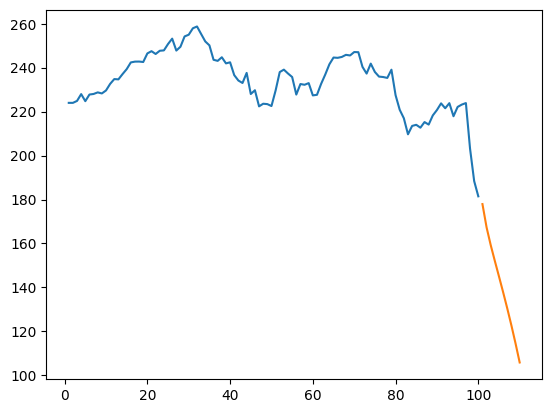

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[3737:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


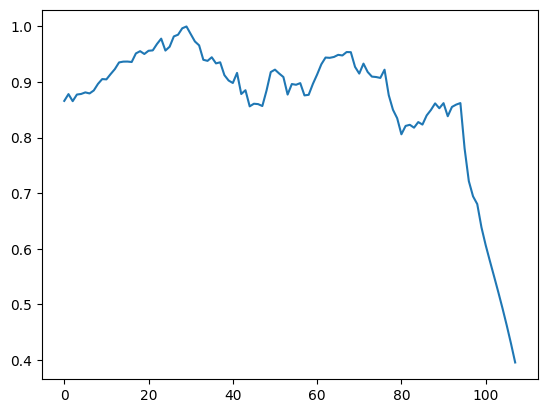

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3739:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

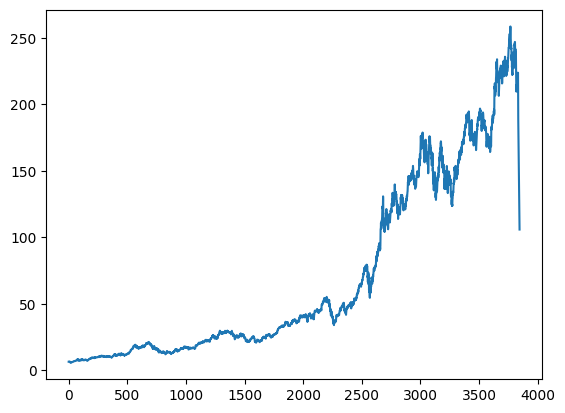

In [ ]:
plt.plot(df3)

In [ ]:
z=scaler.inverse_transform(lst_output)

In [ ]:
z

array([[177.92985686],
       [167.3319997 ],
       [159.25231699],
       [152.02813844],
       [144.97525371],
       [137.83532741],
       [130.45659091],
       [122.7163296 ],
       [114.52860258],
       [105.86193586]])